# YAAD

In [1]:
from yaad import Node
from yaad import ops
from yaad import dot

In [2]:
a = Node(2, requires_grad=True, name='a')
b = Node(3, requires_grad=True, name='b')
c = Node(5, requires_grad=True)
d = a * b
d.retain_grad()
e = d + c

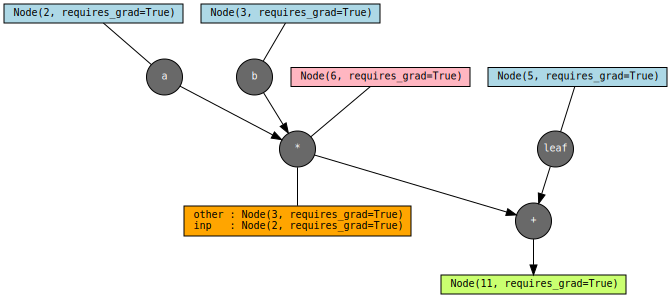

In [3]:
dot.make_dot(e,show_grads=True, show_intermediate_outs=True, show_saved=True)

In [4]:
# de/dd = 1
# de/dc = 1
# de/da = de/dd * dd/da = 1 * 3 = 3
# de/db = de/dd * dd/db = 1 * 2 = 2

In [4]:
node = Node(2)

In [6]:
type(str(node))

str

In [9]:
e.backward()

In [7]:
a.grad.requires_grad

False

In [11]:
b.grad.requires_grad

True

In [12]:
c.grad.requires_grad

False

In [9]:
print(a.grad, b.grad, c.grad)

Node(data=2.0, grad=None) Node(data=3.0, grad=None) Node(data=1.0)


In [5]:
d.op

In [6]:
d.backward()

In [7]:
d.grad

/workspace/personal/yaad/yaad/node.py:44: UserWarning: gradient attribute of non-leaf nodes are not stored unless `retain_grad` has been explicitly set.
  warnings.warn(


True

In [5]:
d.op.next_ops

(<yaad.ops.LeafOp at 0x7f9ff4643190>, <yaad.ops.MulOp at 0x7f9ff46430a0>)

In [5]:
d.op.grad_store

Node(data=1.0)

In [6]:
e = b+c

In [7]:
e.op.grad_store

GradStore(value=0.0)

# Pytorch

In [72]:
import torch

In [73]:
a = torch.randn(1,requires_grad = True)

In [74]:
b = torch.randn(1,requires_grad = True)

In [75]:
c = a*b

In [76]:
grad = torch.autograd.grad(c,[a,b],create_graph=True)

In [77]:
grad2 = torch.autograd.grad(grad[1], [b],)

RuntimeError: One of the differentiated Tensors appears to not have been used in the graph. Set allow_unused=True if this is the desired behavior.

In [17]:
b is grad[0].grad_fn.next_functions[1][0].variable

True

In [71]:
grad2

(tensor([1.]),)

In [19]:
a

tensor([0.7873], requires_grad=True)

In [12]:
b = a + 2

In [13]:
c = 2*b

In [14]:
# c = 2*a + 4

In [15]:
d = c.mean()

In [16]:
d.backward(create_graph=True)

/usr/local/lib/python3.8/dist-packages/torch/autograd/__init__.py:173: UserWarning: Using backward() with create_graph=True will create a reference cycle between the parameter and its gradient which can cause a memory leak. We recommend using autograd.grad when creating the graph to avoid this. If you have to use this function, make sure to reset the .grad fields of your parameters to None after use to break the cycle and avoid the leak. (Triggered internally at  ../torch/csrc/autograd/engine.cpp:995.)
  Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass


In [22]:
a.grad

tensor([1., 1.])